# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 653


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
#city_data = []

# Print to logger
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters
#record_count = 1
#set_count = 1

# Loop through all the cities in our list to fetch weather data
#for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 0

        # Create endpoint URL with each city
        #city_url = url + "&q=" + city
    
        # Log the url, record, and set numbers
        #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

        # Add 1 to the record count
        #record_count += 1

        # Run an API request for each of the cities
        #try:
            # Parse the JSON and retrieve data
            #city_weather = requests.get(city_url).json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            #city_lat = city_weather["coord"]["lat"]
            #city_lng = city_weather["coord"]["lon"]
            #city_max_temp = city_weather["main"]["temp_max"]
            #city_humidity = city_weather["main"]["humidity"]
            #city_clouds = city_weather["clouds"]["all"]
            #city_wind = city_weather["wind"]["speed"]
            #city_country = city_weather["sys"]["country"]
            #city_date = city_weather["dt"]

            # Append the City information into city_data list
            #city_data.append({"City": city, 
                          #"Lat": city_lat, 
                          #"Lng": city_lng, 
                          #"Max Temp": city_max_temp,
                          #"Humidity": city_humidity,
                          #"Cloudiness": city_clouds,
                          #"Wind Speed": city_wind,
                          #"Country": city_country,
                          #"Date": city_date})

        # If an error is experienced, skip the city
        #except:
            #print("City not found. Skipping...")
            #pass
                  
# Indicate that Data Loading is complete 
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")    
        
        
        
        
    # Create endpoint URL with each city
    #city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    #record_count += 1

    # Run an API request for each of the cities
    #try:
        # Parse the JSON and retrieve data
        #city_weather = requests.get(query_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #city_lat = ["coord"]["lat"]
        #city_lng = ["coord"]["lon"]
        #city_max_temp = ["main"]["temp_max"]
        #city_humidity = ["main"]["humidity"]
        #city_clouds = ["clouds"]["all"]
        #city_wind = ["wind"]["speed"]
        #city_country = ["sys"]["country"]
        #city_date = ["dt"]

        # Append the City information into city_data list
        #city_data.append({"City": city, 
                          #"Lat": city_lat, 
                          #"Lng": city_lng, 
                          #"Max Temp": city_max_temp,
                          #"Humidity": city_humidity,
                          #"Cloudiness": city_clouds,
                          #"Wind Speed": city_wind,
                          #"Country": city_country,
                          #"Date": city_date})

    # If an error is experienced, skip the city
    #except:
        #print("City not found. Skipping...")
        #pass
              
# Indicate that Data Loading is complete 
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san rafael
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | impfondo
Processing Record 6 of Set 1 | wad madani
Processing Record 7 of Set 1 | acuna
City not found. Skipping...
Processing Record 8 of Set 1 | berdigestyakh
Processing Record 9 of Set 1 | namibe
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | fort nelson
Processing Record 13 of Set 1 | ostrovnoy
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | talnakh
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | praia da vitoria
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | warqla
City not found. Skipping...
Processing Record 21 of Set 1 | hithadhoo
Processing Rec

Processing Record 36 of Set 4 | san vicente
Processing Record 37 of Set 4 | narsaq
Processing Record 38 of Set 4 | guerrero negro
Processing Record 39 of Set 4 | estelle
Processing Record 40 of Set 4 | sao felix do xingu
Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | waw
Processing Record 43 of Set 4 | paralimni
Processing Record 44 of Set 4 | burnie
Processing Record 45 of Set 4 | lakatoro
Processing Record 46 of Set 4 | buariki
City not found. Skipping...
Processing Record 47 of Set 4 | lebu
Processing Record 48 of Set 4 | hvolsvollur
Processing Record 49 of Set 4 | cochrane
Processing Record 0 of Set 5 | koslan
Processing Record 1 of Set 5 | kjopsvik
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | san jeronimo
Processing Record 4 of Set 5 | fandriana
Processing Record 5 of Set 5 | ratnagiri
Processing Record 6 of Set 5 | cacu
Processing Record 7 of Set 5 | thessalon
Processing Record 8 of Set 5 | gawler
Processing Record 9 of 

City not found. Skipping...
Processing Record 23 of Set 8 | dzilam gonzalez
Processing Record 24 of Set 8 | korla
Processing Record 25 of Set 8 | polunochnoye
Processing Record 26 of Set 8 | atikokan
Processing Record 27 of Set 8 | deputatskiy
Processing Record 28 of Set 8 | bondoukou
Processing Record 29 of Set 8 | casa grande
Processing Record 30 of Set 8 | colac
Processing Record 31 of Set 8 | tsaratanana
Processing Record 32 of Set 8 | thompson
Processing Record 33 of Set 8 | kenai
Processing Record 34 of Set 8 | tommot
Processing Record 35 of Set 8 | wenchi
Processing Record 36 of Set 8 | svetlyy
Processing Record 37 of Set 8 | bambous virieux
Processing Record 38 of Set 8 | puerto ayacucho
Processing Record 39 of Set 8 | stephenville
Processing Record 40 of Set 8 | amderma
City not found. Skipping...
Processing Record 41 of Set 8 | boa vista
Processing Record 42 of Set 8 | radovitskiy
Processing Record 43 of Set 8 | naryan-mar
Processing Record 44 of Set 8 | llanes
Processing Rec

Processing Record 12 of Set 12 | plaster rock
Processing Record 13 of Set 12 | santa vitoria do palmar
Processing Record 14 of Set 12 | kloulklubed
Processing Record 15 of Set 12 | totness
Processing Record 16 of Set 12 | inta
Processing Record 17 of Set 12 | rapid valley
Processing Record 18 of Set 12 | camacha
Processing Record 19 of Set 12 | goundam
Processing Record 20 of Set 12 | strezhevoy
Processing Record 21 of Set 12 | kidal
Processing Record 22 of Set 12 | sonoita
Processing Record 23 of Set 12 | edd
Processing Record 24 of Set 12 | megalopoli
Processing Record 25 of Set 12 | sitio novo do tocantins
Processing Record 26 of Set 12 | komsomolskiy
Processing Record 27 of Set 12 | chenzhou
Processing Record 28 of Set 12 | kirakira
Processing Record 29 of Set 12 | zaozerne
Processing Record 30 of Set 12 | kaeo
Processing Record 31 of Set 12 | japura
Processing Record 32 of Set 12 | abiramam
Processing Record 33 of Set 12 | mount isa
Processing Record 34 of Set 12 | bangkal
Process

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san rafael,-34.6177,-68.3301,32.75,28,3,3.67,AR,1679004388
1,arraial do cabo,-22.9661,-42.0278,25.98,69,0,4.63,BR,1679004389
2,vaini,-21.2000,-175.2000,28.09,83,75,7.20,TO,1679004391
3,rikitea,-23.1203,-134.9692,26.32,75,1,6.21,PF,1679004391
4,impfondo,1.6381,18.0667,20.75,96,100,1.22,CG,1679004392


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san rafael,-34.6177,-68.3301,32.75,28,3,3.67,AR,1679004388
1,arraial do cabo,-22.9661,-42.0278,25.98,69,0,4.63,BR,1679004389
2,vaini,-21.2000,-175.2000,28.09,83,75,7.20,TO,1679004391
3,rikitea,-23.1203,-134.9692,26.32,75,1,6.21,PF,1679004391
4,impfondo,1.6381,18.0667,20.75,96,100,1.22,CG,1679004392


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

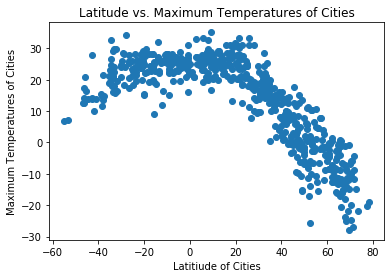

In [20]:
# Build scatter plot for latitude vs. temperature
cities_lat = city_data_df["Lat"]
cities_temp = city_data_df["Max Temp"]
plt.scatter(cities_lat, cities_temp)

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities")
plt.ylabel("Maximum Temperatures of Cities")
plt.title("Latitude vs. Maximum Temperatures of Cities")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

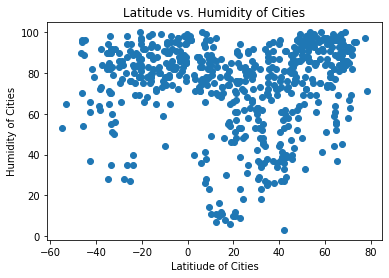

In [22]:
# Build the scatter plots for latitude vs. humidity
cities_lat = city_data_df["Lat"]
cities_hum = city_data_df["Humidity"]
plt.scatter(cities_lat, cities_hum)

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities")
plt.ylabel("Humidity of Cities")
plt.title("Latitude vs. Humidity of Cities")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

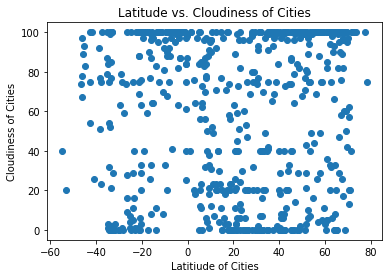

In [24]:
# Build the scatter plots for latitude vs. cloudiness
cities_lat = city_data_df["Lat"]
cities_clo = city_data_df["Cloudiness"]
plt.scatter(cities_lat, cities_clo)

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities")
plt.ylabel("Cloudiness of Cities")
plt.title("Latitude vs. Cloudiness of Cities")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

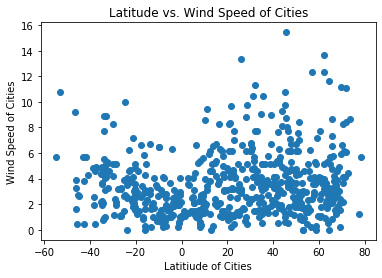

In [26]:
# Build the scatter plots for latitude vs. wind speed
cities_lat = city_data_df["Lat"]
cities_ws = city_data_df["Wind Speed"]
plt.scatter(cities_lat, cities_ws)

# Incorporate the other graph properties
plt.xlabel("Latitiude of Cities")
plt.ylabel("Wind Speed of Cities")
plt.title("Latitude vs. Wind Speed of Cities")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE